In [1]:
import json
import os
import argparse
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import copy
from scipy import stats
from datetime import datetime
import experiment_participant_analysis as epa
from importlib import reload

pd.set_option('display.max_rows', 181)
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_colwidth', 60)

In [2]:
# import
dataframe = pd.read_csv('data/Exp2/dataframe_complete.csv')

In [3]:
dataframe

,pid,condition,condition_type,beginHit,beginExp,endHit,totalTime,attempts,genEdu,comEdu,age,gender,qUnd,qDes,feedback,cheatTrials,status,numberClicks,rews_exp,rews_exp_total,rews_exp_mean,scores,pa_mean,pa_complete,pa_et
0,0,0,experimental,2020-09-17 16:43:47.821768,2020-09-17 16:52:11.367289,NaN,-,1,-,-,-,-,-,-,-,2,6,"[3, 1, 0, 0, 1, 1, 1, 1, 1]","[-3, -1, 0, 0, 47, -1, 47, 23, -1]",111.0,12.333333,"[19, 23, 36, 24, 35, -53, 41, 25, 17]",0.1852,"[0.167, 0.25, 0.0, 0.0, 0.25, 0.25, 0.25, 0.25, 0.25]","[3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0]"
1,1,0,experimental,2020-09-17 15:49:49.980608,2020-09-17 15:55:44.654321,2020-09-17 16:00:03.763485,10.1,2,College degree,No,56,female,yes,click on the roots and then move to the root with the hi...,NaN,0,4,"[5, 7, 12, 3, 3, 3, 3, 3, 3, 3]","[27, 11, -60, 21, 21, 45, 45, 45, 45, 45]",245.0,24.500000,"[27, 11, -60, 21, 9, 51, 37, 33, 39, 45]",0.8475,"[0.667, 0.5, 0.308, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,2,0,experimental,2020-09-17 15:49:44.191565,2020-09-17 15:57:13.445576,2020-09-17 16:02:25.868371,12.6,2,College degree,No,27,Female,Yes,You want to click on all of the root nodes. If any of th...,"This HIT took a while to learn, and even the possible bo...",0,4,"[12, 6, 3, 5, 5, 5, 9, 12, 9, 6]","[-26, 48, 45, 45, 41, 23, 33, -40, 27, 36]",232.0,23.200000,"[-26, 48, 47, 41, 33, 15, 33, -40, 27, 36]",0.5559,"[0.308, 0.571, 1.0, 0.667, 0.667, 0.667, 0.4, 0.308, 0.4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,3,0,experimental,2020-09-17 15:49:52.936122,2020-09-17 15:58:35.105059,2020-09-17 16:03:23.922089,13.0,1,High school graduate,No,39,male,not completely,Avoid clicking on unnecessary nodes.,NaN,0,4,"[2, 2, 2, 2, 2, 2, 1, 1, 2, 3]","[2, 2, -2, -2, 4, -2, 3, 7, 6, -7]",11.0,1.100000,"[48, 30, 22, -58, -20, 10, 31, 57, -18, -51]",0.0000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]"
4,4,0,experimental,2020-09-17 15:47:14.91915,2020-09-17 15:58:45.586304,2020-09-17 16:10:49.739643,23.3,2,College degree,No,34,Male,I believe so.,Reveal the nodes at the root to see what may be the best...,NaN,0,4,"[12, 3, 3, 12, 3, 5, 3, 3, 3, 3]","[10, 21, -27, 10, 45, 47, 21, 45, 45, 45]",262.0,26.200000,"[10, 31, -17, 10, 47, 49, 25, 43, 35, 51]",0.8283,"[0.308, 1.0, 1.0, 0.308, 1.0, 0.667, 1.0, 1.0, 1.0, 1.0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
5,5,0,experimental,2020-09-17 15:58:25.797498,2020-09-17 16:01:15.583599,2020-09-17 16:05:07.067161,6.5,1,College degree,No,28,female,yes,click on the nodes closest to the monkey when first star...,NaN,0,4,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]","[45, 45, 21, 21, 21, 21, 21, 45, 45, 45]",330.0,33.000000,"[43, 51, 29, 25, 21, 27, 21, 39, 39, 37]",1.0000,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
6,6,0,experimental,2020-09-17 15:57:37.233026,2020-09-17 16:03:03.71369,2020-09-17 16:06:39.284881,8.7,1,College degree,No,37,female,Yes,Follow the flow chart until all of the nodes it is telli...,none,0,4,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]","[45, 45, 21, 45, 45, 45, 21, 45, 45, 45]",402.0,40.200000,"[37, 39, 21, 47, 33, 45, 25, 45, 51, 39]",1.0000,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
7,7,0,experimental,2020-09-17 16:00:39.600991,2020-09-17 16:03:27.604618,2020-09-17 16:06:02.191414,5.2,1,College degree,Yes,33,Male,Yes.,Click on all of the first row of nodes.,NaN,0,4,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]","[-51, 45, 45, 21, 45, 21, 21, 45, -51, 45]",186.0,18.600000,"[-63, 51, 43, 25, 37, 31, 9, 47, -47, 45]",1.0000,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
8,8,0,experimental,2020-09-17 16:00:07.84709,2020-09-17 16:04:59.7929,2020-09-17 16:08:03.169395,7.1,1,College degree,No,27,male,yes,"you have nodes you know the value of and some you dont, ...",no,0,4,"[3, 12, 3, 2, 5, 2, 1, 2, 3, 3]","[21, -50, 21, 46, 43, 46, 47, 46, 21, 45]",286.0,28.600000,"[21, -50, 15, 40, 45

In [4]:
# ............................Filter.................................................
# .............................................................................
# .............................................................................

In [5]:
def r(number):
    return round(number,2)

def getDropoutStats(df1,df2, title):
    print('')
    print(title)
    print('Initial participants: {}'.format(len(df1)))
    print('Difference: {}'.format(len(df1) - len(df2)))
    print('Percentage: {}'.format(r(1-len(df2)/len(df1))))
    
    for c in df1.condition_type.unique().tolist():
        print('Percentage in condition {}: {}'.format(c,r(1-len(df2[df2.condition_type == c])/len(df1[df1.condition_type == c]))))
        
        

In [6]:
# filter for finished
df_valid_all = dataframe[dataframe.status != 6]
df_valid_all.reset_index(inplace = True, drop=True)
getDropoutStats(dataframe, df_valid_all, 'Dropouts')

# filter with exclusion criterion
df_valid = df_valid_all[df_valid_all.cheatTrials < 10]
getDropoutStats(df_valid_all, df_valid, 'Exclusion')


df_exp = df_valid[df_valid.condition == 0]
df_cont = df_valid[df_valid.condition == 1]
dfs = [df_exp ,df_cont]

print('')
print(len(df_exp))
print(len(df_cont))


Dropouts
Initial participants: 163
Difference: 11
Percentage: 0.07
Percentage in condition experimental: 0.08
Percentage in condition control: 0.05

Exclusion
Initial participants: 152
Difference: 6
Percentage: 0.04
Percentage in condition experimental: 0.01
Percentage in condition control: 0.07

76
70


In [7]:
# ............................ Results .....................................................
# ..........................................................................................
# ..........................................................................................

In [8]:
print(stats.shapiro(df_valid.pa_mean))
print(stats.fligner(df_exp.pa_mean, df_cont.pa_mean))

(0.9396474361419678, 6.5013186940632295e-06)
FlignerResult(statistic=3.9024142329172125, pvalue=0.04821677253419602)


In [31]:
epa.print_statistics2(df_exp, df_cont, 'pa_mean')

 -- df1 -- 
Median: 0.6566
Mean: 0.705
Std: 0.2399
($0.6566\% \; (M= 0.705\%, SD = 0.2399\%)$)

 -- df2 -- 
Median: 0.4472
Mean: 0.4858
Std: 0.1982
($0.4472\% \; (M= 0.4858\%, SD = 0.1982\%)$)

 -- test-- 
t: 5.9499, p_val: 2e-08
u: 1221.0, p_val: 1e-08



In [32]:
print(stats.shapiro(df_valid.rews_exp_mean))
print(stats.fligner(df_exp.rews_exp_mean, df_cont.rews_exp_mean))

(0.9780592918395996, 0.01925576664507389)
FlignerResult(statistic=1.4583937690307596, pvalue=0.22718586188066575)


In [33]:
epa.print_statistics2(df_exp, df_cont, 'rews_exp_mean')

 -- df1 -- 
Median: 24.45
Mean: 24.0171
Std: 7.3798
($24.45\% \; (M= 24.0171\%, SD = 7.3798\%)$)

 -- df2 -- 
Median: 22.85
Mean: 22.75
Std: 8.1754
($22.85\% \; (M= 22.75\%, SD = 8.1754\%)$)

 -- test-- 
t: 0.9775, p_val: 0.32998285
u: 2384.0, p_val: 0.14023306



In [34]:
print(24.45/30.14)
print(22.85/30.14)

0.8112143331121433
0.7581287325812873


In [13]:
#correlation
stats.pearsonr(df_valid.rews_exp_total.tolist(), df_valid.pa_mean.tolist())

(0.3612611383334442, 7.4692851419559275e-06)

In [14]:
print(len(df_exp[df_exp.pa_mean > 0.5])/len(df_exp))
print(len(df_cont[df_cont.pa_mean > 0.5])/len(df_cont))

0.8157894736842105
0.35714285714285715


In [15]:
print(len(df_exp[df_exp.pa_mean > 0.8])/len(df_exp))
print(len(df_cont[df_cont.pa_mean > 0.8])/len(df_cont))

0.3684210526315789
0.08571428571428572


In [16]:
#df_valid_all

In [17]:
# ............................ Plots .....................................................
# ..........................................................................................
# ..........................................................................................

[0.1, 0.30000000000000004, 0.5, 0.7, 0.9]


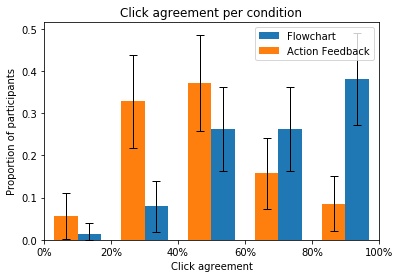

In [18]:
epa.create_barplot(df_exp, df_cont, 'pa_mean', [0 , 0.2, 0.4, 0.6, 0.8, 1])
plt.legend()
plt.xticks([0., 0.2, 0.4,  0.6,  0.8,  1], labels=['0%', '20%','40%', '60%', '80%','100%'])
plt.title('Click agreement per condition')
plt.xlabel('Click agreement')
plt.ylabel('Proportion of participants')
plt.savefig('plots/Exp2/exp2_ca.png', dpi=300)

[-2.0, 8.0, 18.0, 28.0, 38.0]


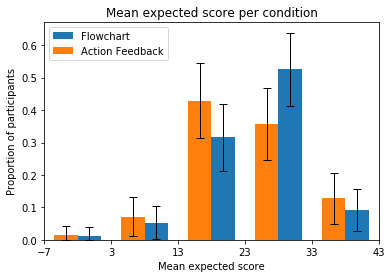

In [19]:
epa.create_barplot(df_exp, df_cont, 'rews_exp_mean', [-7,  3, 13, 23, 33, 43])
plt.legend()
plt.title('Mean expected score per condition')
plt.xlabel('Mean expected score')
plt.ylabel('Proportion of participants')
plt.savefig('plots/Exp2/exp2_emr.png', dpi=300)

In [20]:
epa.getBins(df_valid.rews_exp_mean.tolist(), 5)

-5.1
40.2
[-7.  3. 13. 23. 33. 43.]
[-2.  8. 18. 28. 38.]


array([-7.,  3., 13., 23., 33., 43.])

In [21]:
# ............................ Stats .....................................................
# ..........................................................................................
# ..........................................................................................

In [22]:
#df_valid_all[df_valid_all.condition == 3].qConf.tolist()
#df_valid_all[df_valid_all.condition == 3].qDesc.tolist()
#df_valid_all[df_valid_all.condition == 1].qDiff.tolist()
#df_valid_all[df_valid_all.condition == 3].feedback.tolist()

8.171052631578947
10.460526315789474
5.928571428571429


(array([28., 40., 32., 15., 21., 11.,  2.,  2.,  0.,  1.]),
 array([ 3.4 ,  5.39,  7.38,  9.37, 11.36, 13.35, 15.34, 17.33, 19.32, 21.31, 23.3 ]),
 <a list of 10 Patch objects>)

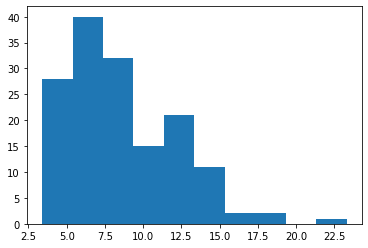

In [23]:
# calculate mean time 
tt = [int(float(a)) for a in df_valid_all['totalTime'].to_list() if a != '-']
print(np.mean(tt))

# calculate mean time 
tt = [int(float(a)) for a in df_exp['totalTime'].to_list() if a != '-']
print(np.mean(tt))

# calculate mean time 
tt = [int(float(a)) for a in df_cont['totalTime'].to_list() if a != '-']
print(np.mean(tt))

plt.hist(df_valid_all.totalTime.astype(float))

In [24]:
# calculate mean age:
# typos
age_temp = df_valid_all[df_valid_all.age != '-' ].age.astype(int)

print( np.mean( age_temp ) )
print( np.min( age_temp ) )
print( np.max( age_temp ) )

36.020833333333336
20
65


In [25]:
# calculate gender:
gender_temp = df_valid_all[ df_valid_all.gender != '-'].gender.str.lower().str.contains("f")
print(np.sum(gender_temp))

62


0
4
0.6644736842105263


(array([57.,  0.,  0., 15.,  0.,  0.,  3.,  0.,  0.,  1.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

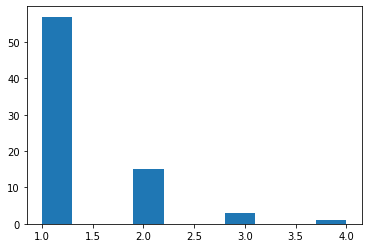

In [26]:
# stats attempts
print(df_valid_all.attempts.min())
print(df_valid_all.attempts.max())
print(df_valid_all.attempts.mean())
plt.hist(df_exp.attempts)

In [27]:
# stats genEdu
df_valid_all.groupby('genEdu')['pid'].nunique()

genEdu
College degree          111
High school graduate     41
Name: pid, dtype: int64

In [28]:
# stats comEdu
df_valid_all.groupby('comEdu')['pid'].nunique()

comEdu
No     117
Yes     35
Name: pid, dtype: int64

0
4
0.11842105263157894


(array([72.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

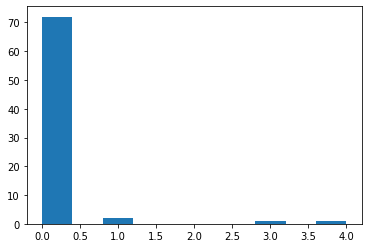

In [29]:
# stats cheat
print(df_exp.cheatTrials.min())
print(df_exp.cheatTrials.max())
print(df_exp.cheatTrials.mean())
plt.hist(df_exp.cheatTrials)